In [1]:
###starts here
## import all to create a hybrid model
import pandas as pd
import quandl
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import TransformerMixin
from sklearn.datasets import make_regression
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn import preprocessing,cross_validation
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVR
from mlxtend.regressor import StackingRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics

/root/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
quandl.ApiConfig.api_key = "zuiQMfguw3rRgLvkCzxk"
df=quandl.get('WIKI/GOOGl')

In [3]:
##see the data
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [4]:
### create the specfic ammount of label and feture 
df1=df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]

###redefining the data
### adding some feture to the datasets
df1['volatility']=(df1['Adj. High']-df1['Adj. Close'])/df1['Adj. Close']
df1['PCT_Change']=(df1['Adj. Close']-df1['Adj. Open'])/df1['Adj. Open'] 

/root/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/root/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [5]:
## now making our final dataframe
df1=df1[['Adj. Close','volatility','PCT_Change','Adj. Open','Adj. Volume']]

In [6]:
## setting the forcast column what se gonna predict
forcast_col='Adj. Close'

In [7]:
##replace the null value with -99999
df1.fillna(-999999,inplace=True)

In [8]:
##### importing some mathmatical function
##### and we predict the 1% of the data
import math
forcast_out = int(math.ceil(.1*(len(df1))))
print forcast_out

343


In [28]:
## plotting the data
## lets plot the output before the prdiction
Y=df1[forcast_col]
X=range(len(df1[forcast_col]))
print X

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

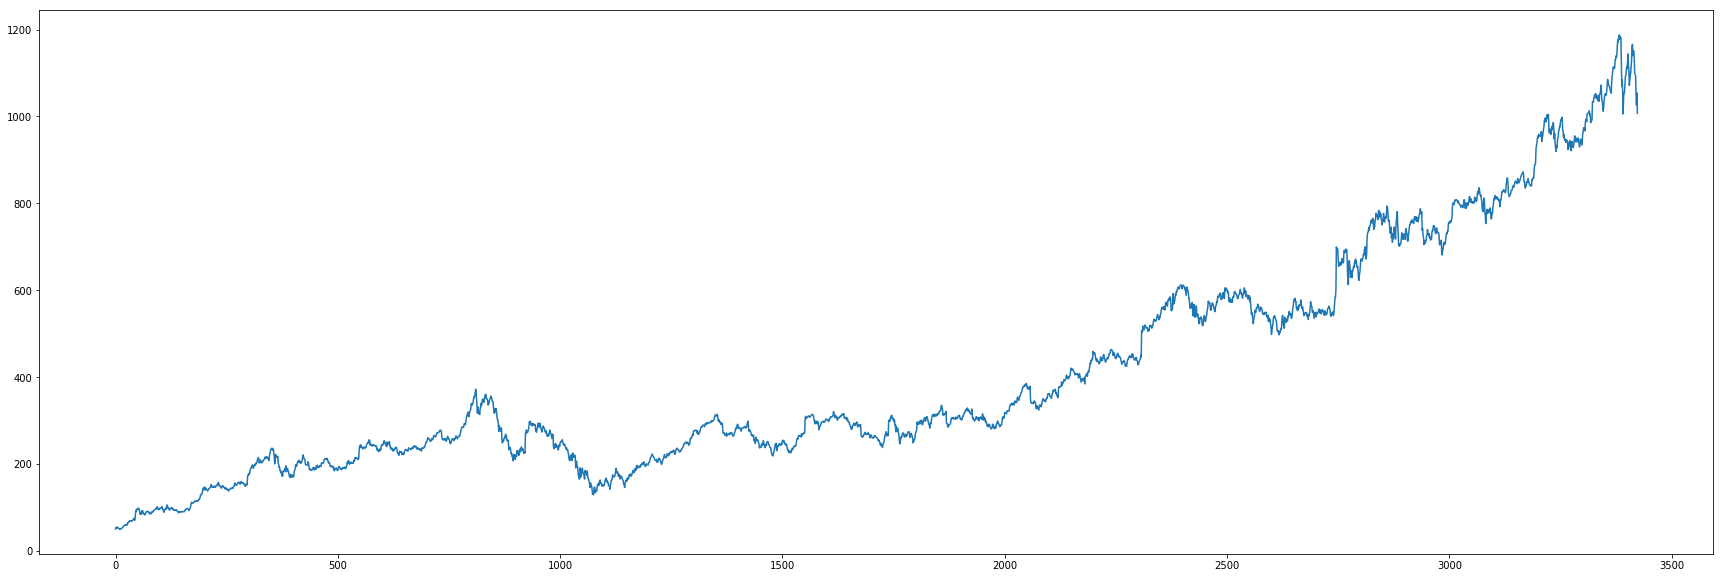

In [10]:
fig_size=[30,10]
plt.rcParams["figure.figsize"] = fig_size
plt.plot(X,Y)

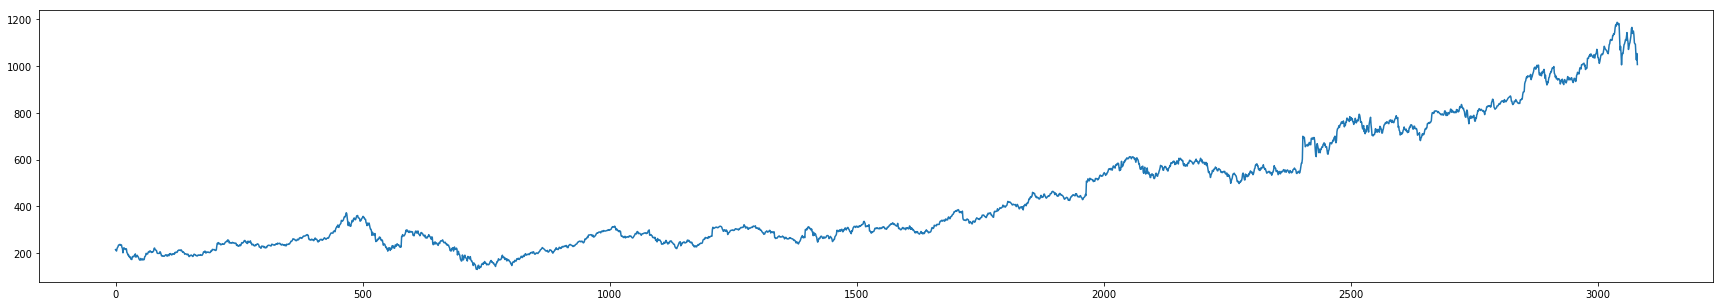

In [11]:
df1['label'] = df[forcast_col].shift(-forcast_out)
y1 = df1['label']
x1=range(len(df1['label']))
fig_size=[30,5]
plt.rcParams["figure.figsize"] = fig_size
plt.plot(x1,y1)

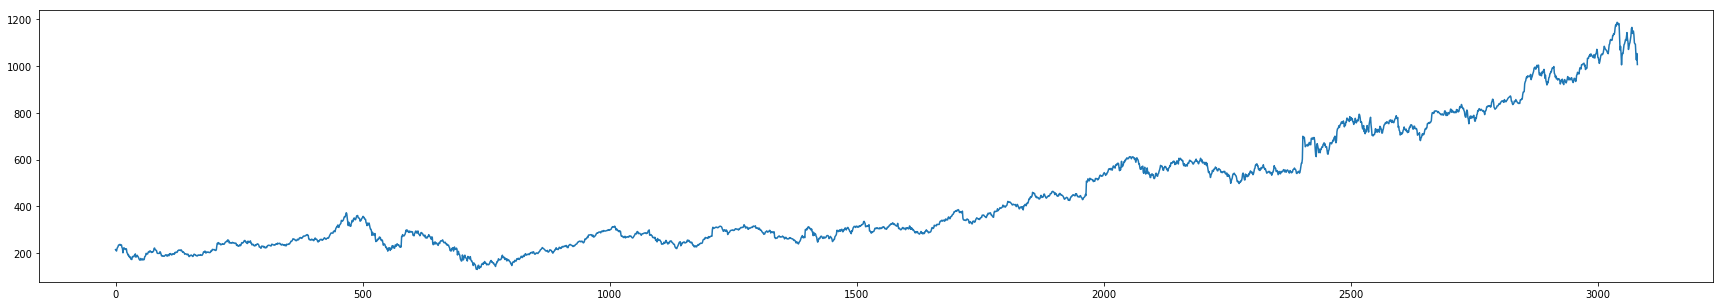

In [12]:
df1['label'] = df[forcast_col].shift(-forcast_out)
y1 = df1['label']
x1=range(len(df1['label']))
fig_size=[30,5]
plt.rcParams["figure.figsize"] = fig_size
plt.plot(x1,y1)

In [13]:
X=np.array(df1.drop(['label'],1))

In [14]:
##scale the data
X=preprocessing.scale(X)
X=X[:-forcast_out]  ##data what is known
X_lately=X[-forcast_out:]
##X_lately.reshape(1, -1)##data which is not known
df1.dropna(inplace=True)

In [15]:
Y=np.array(df1['label'])

In [16]:
xtrain,xtest,ytrain,ytest=cross_validation.train_test_split(X,Y,test_size=0.2)


In [17]:
n_neighbors=20
clf1 = KNeighborsRegressor(n_neighbors)  # create a classifire object
clf1.fit(xtrain,ytrain) # train data related with fir() method
accuracy1=clf1.score(xtest,ytest) # test data related with score() method
print "the accuracy is "+str(accuracy1)


the accuracy is 0.9216072548219089


In [18]:
df2=pd.DataFrame()

In [19]:
df2['first']=clf1.predict(X_lately)
one=np.array(df2['first'])

In [20]:
from sklearn.linear_model import LinearRegression
clf2 = LinearRegression()  # create a classifire object
clf2.fit(xtrain,ytrain) # train data related with fir() method
accuracy2=clf2.score(xtest,ytest) # test data related with score() method
print "the accuracy is "+str(accuracy2)
df2['Second']=clf1.predict(X_lately)

the accuracy is 0.877653741377177


In [21]:
from sklearn import svm
clf3 = svm.SVR()  # create a classifire object
clf3.fit(xtrain,ytrain) # train data related with fir() method
accuracy3=clf3.score(xtest,ytest) # test data related with score() method
print "the accuracy is "+str(accuracy3)
df2['third']=clf3.predict(X_lately)

the accuracy is 0.7262742374943117


In [22]:
#df2 = df2.T
df2=df2.mean(axis=1)
two=np.array(df2)

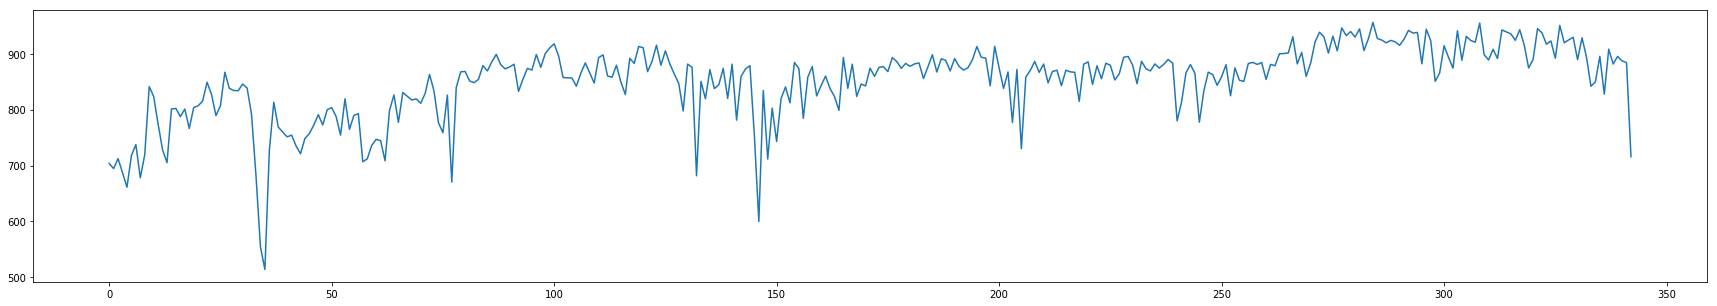

In [23]:
df2.plot()

In [24]:
import datetime

In [25]:
#now create another label for forcast data that we need
df1['forcast']=np.nan



In [26]:
last_date=df1.iloc[-1].name

In [27]:
forcast_set=np.array(zz)

NameError: name 'zz' is not defined

In [ ]:
last_unix=last_date.timestamp() #it is a function of the time module that can convert the time to
#a computer can understand

In [ ]:
one_day=86400 #in seconds
next_unix=last_unix+one_day  #next day


In [ ]:
for i in forcast_set:    # iterating through the forcast set
    next_date = datetime.datetime.fromtimestamp(next_unix) # find the next date for the data
    next_unix+=one_day  #increment for finding next date
    df1.loc[next_date] =[np.nan for item in range(len(df1.columns)-1)]+[i]  #settinf up the date as a
    #index and adding value of the forast_set element with nand (adding value with nand will replace 
    #the value of the nan

In [ ]:
df1['forcast'].plot()
plt.xlabel('Date')
plt.ylabel('Price')


In [ ]:
df1['Adj. Close'].plot()
df1['forcast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error


In [ ]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   


In [ ]:
class stacked_model():
    def __init__(self,models):
        self.models = models
        
    def fit(self,X,y):
        self.models_=[clone(x) for x in self.models]
        
        ##train clone based models
        
        
        for model in self.models_:
            model.fit(X,y)
            
        return self
    
    def predict(self,X):
        predictions=np.column_stack([model.predict(X) for model in self.models_])
        return np.mean(predictions,axis=1)
        

In [ ]:
averaged_models = AveragingModels(models = (clf1, clf2, clf3))

In [ ]:
print averaged_models

In [ ]:
averaged_models = stacked_model(models = (clf1, clf2, clf3))

In [ ]:
averaged_models

In [ ]:
averaged_models.fit(xtrain,ytrain)

In [ ]:
averaged_models.fit(xtrain,ytrain)

In [ ]:
len(zz)

In [ ]:
forcast_out

In [ ]:
averaged_models = AveragingModels(models = (clf1, clf2, clf3))

In [ ]:
averaged_models.fit(xtrain,ytrain)

In [ ]:
averaged_models.fit(xtrain,ytrain)

In [ ]:
zz=averaged_models.predict(X_lately)

In [ ]:
averaged_models_accuracy=averaged_models.score(X_test,y_test)